# **Supermarket Customers Dataset**

## **Latar Belakang**

Sebuah Supermarket di Kota A ingin tetap menjadi pilihan utama pelanggannya di tengah persaingan yang semakin ketat. Salah satu cara untuk mencapai hal ini adalah dengan memahami lebih jauh tentang pelanggannya. Sebagai langkah awal Supermarket meminta tim Data Analyst untuk melakukan analisa pada Data pelanggan yang dimiliki oleh Supermarket.

Data yang diberikan merupakan Dataset Pelanggan yang telah berlangganan di Supermarket didalam rentang tahun 2012 sampai 2014. **Di dalam dataset tersebut menyediakan informasi mendetail mengenai pelanggan, termasuk demografi, perilaku belanja, respons terhadap promosi, dan interaksi melalui berbagai saluran penjualan. Dataset ini berpotensi menjadi alat yang sangat berguna untuk analisis dan pengambilan keputusan yang berbasis data.**

Namun dataset tersebut memiliki kekurangan yaitu tidak ada kejelasan tentang rentang tahun pasti per transaksi melainkan hanya berdasarkan tanggal bergabung pelanggan dimulai dari 30/07/2012 untuk pelanggan pertama yang bergabung dan diakhiri di 29/06/2014 untuk pelanggan terakhir yang bergabung dan hanya menampilkan semua total pembelian yang dilakukan pelanggan semenjak bergabung sebagai Member di Supermarket.


### **Rumusan Masalah**

Dari latar belakang diatas maka dirumuskan masalah sebagai berikut :
1. Apakah tahun lahir ,status, pendidikan dan pendapatan Customer mempengaruhi kategori produk yang dibeli?
2. Apakah tahun lahir ,status, pendidikan dan pendapatan Customer mempengaruhi banyaknya produk yang dibeli?
3. Dimanakah Customer lebih sering melakukan transaksi ? (Store, Web, dan Catalogue)
4. Kategori Produk apa yang penjualannya paling tinggi?
5. kategori produk apa yang paling favorit?
6. Apakah Kampanye yang dilakukan diterima oleh Pelanggan?
7. Apakah diskon mempengaruhi banyaknya pembelian oleh Pelanggan?
8. Apakah tingkat complain tinggi?
9. Segmentasi Customer dengan melakukan RFM Analysis

### **Stakeholder**
1. Manager Toko
2. Tim Marketing
3. Tim Web


### **Tujuan Analisis**

Tujuan dari analisis Pelanggan Supermarket ini adalah untuk menjawab rumusan masalah yang telah dijabarkan , serta dari jawaban tersebut
kita dapat menarik kesimpulan dan memberikan rekomendasi kepada para Stakeholder dan mungkin disaat dilakukannya analisis akan mendapatkan temuan-temuan baru yang bisa dijadikan rekomendasi.

## **Data Understanding**


In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load Dataset
df = pd.read_csv('Supermarket Customers.csv', sep = '\t')

**Berikut adalah nama dan keterangan tiap kolom yang ada pada Dataset :**

|Nama Kolom (People)| Keterangan|
|----------|------------|
|ID | Customer's unique identifier|
|Year_Birth | Customer's birth year|
|Education | Customer Education Level|
|Marital_Status | Customer's marital status|
|Income | Customer's yearly household income|
|Kidhome | Number of children in customer's household|
|Teenhome | Number of teenagers in customer's household|
|Dt_Customer | Date of customer's enrollment with the company|
|Recency | Number of days since customer's last purchase|
|Complain | 1 if the customer complained in the last 2 years, 0 otherwise|

|Nama Kolom (Product)| Keterangan|
|----------|------------|
|MntWines | Amount spent on wine in last 2 years|
|MntFruits | Amount spent on fruits in last 2 years|
|MntMeatProducts | Amount spent on meat in last 2 years|
|MntFishProducts | Amount spent on fish in last 2 years|
|MntSweetProducts | Amount spent on sweets in last 2 years|
|MntGoldProds | Amount spent on gold in last 2 years| 

|Nama Kolom (Promotion)| Keterangan|
|----------|------------|
|NumDealsPurchases | Number of purchases made with a discount|
|AcceptedCmp1 | 1 if the customer accepted the offer in the 1st campaign, 0 otherwise|
|AcceptedCmp2 | 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise|
|AcceptedCmp3 | 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise|
|AcceptedCmp4 | 1 if the customer accepted the offer in the 4th campaign, 0 otherwise|
|AcceptedCmp5 | 1 if the customer accepted the offer in the 5th campaign, 0 otherwise|
|Response | 1 if the customer accepted the offer in the last campaign, 0 otherwise|


|Nama Kolom (Place)| Keterangan|
|----------|------------|
|NumWebPurchases | Number of purchases made through the company’s website|
|NumCatalogPurchases | Number of purchases made using a catalog|
|NumStorePurchases | Number of purchases made directly in stores|
|NumWebVisitsMonth | Number of visits to the company’s website in the last month|

In [3]:
# Menampilkan 5 kolom teratas pada dataset
pd.set_option('display.max_columns', 30)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## **Data Cleaning & Finding Anomalies**

In [4]:
# Menampilkan gambaran informasi dari setiap Kolom
df_desc = []

for i in df.columns:
    df_desc.append([i,df[i].dtypes,
                    df[i].isna().sum(),
                    round((df[i].isna().sum()/len(df)*100),2),
                    df[i].nunique(),
                    df[i].sample(3).values])

df_deepInfo = pd.DataFrame(df_desc, columns = ['dataFeatures', 'dataType', 'null', 'nullPct', 'unique','uniqueSample'])
df_deepInfo

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID,int64,0,0.00,2240,"[6887, 254, 1127]"
1,Year_Birth,int64,0,0.00,59,"[1953, 1963, 1962]"
2,Education,object,0,0.00,5,"[PhD, PhD, Master]"
3,Marital_Status,object,0,0.00,8,"[Together, Together, Together]"
4,Income,float64,24,1.07,1974,"[55239.0, 62450.0, 75283.0]"
5,Kidhome,int64,0,0.00,3,"[0, 0, 1]"
6,Teenhome,int64,0,0.00,3,"[0, 0, 0]"
7,Dt_Customer,object,0,0.00,663,"[12-05-2013, 05-01-2013, 04-05-2014]"
8,Recency,int64,0,0.00,100,"[5, 30, 88]"
9,MntWines,int64,0,0.00,776,"[1184, 52, 144]"


Dari tabel diatas dapat kita lihat bahwa :
1. terdapat Missing Value pada kolom Income sebanyak 24 baris
2. Tipe Data Dt_Customer masih berbentuk Object 

### **Check Duplicated Value**

In [5]:
# Check keseluruhan duplikasi
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Dari hasil Check keseluruhan Duplicated diatas tidak ditemukan baris yang terdapat Duplikasinya.

In [6]:
# Check Duplikasi dikolom ID
df[df['ID'].duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


Dari hasil Check Duplicated diatas tidak ditemukan adanya baris yang memiliki nilai yang sama pada kolom ID.

In [7]:
# Mendapatkan daftar semua kolom
all_columns = df.columns.tolist()

# Hapus kolom ID dari daftar kolom
subset_columns = all_columns.copy()
subset_columns.remove('ID')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom ID)
duplicate_rows = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
30,6864,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1138,10617,1989,Master,Divorced,10979.0,0,0,22-05-2014,34,8,4,10,2,2,4,2,3,0,3,5,0,0,0,0,0,0,3,11,0
1203,234,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
260,10264,1979,Graduation,Divorced,15287.0,1,0,10-10-2012,60,1,2,8,4,3,13,2,1,1,2,7,1,0,0,0,0,0,3,11,1
558,8420,1970,2n Cycle,Married,15315.0,0,0,03-08-2013,27,7,4,13,15,8,17,2,2,0,4,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,5536,1959,Graduation,Together,87771.0,0,1,22-05-2013,61,1492,38,287,50,57,33,1,5,10,4,6,0,1,1,1,1,0,3,11,1
1301,6024,1953,Graduation,Together,94384.0,0,0,04-03-2013,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
943,5386,1953,Graduation,Together,94384.0,0,0,04-03-2013,62,1111,24,790,160,45,172,0,5,8,5,2,0,1,1,1,0,0,3,11,1
650,4248,1960,Master,Single,98777.0,0,0,17-02-2014,23,1000,19,711,125,115,38,0,4,6,9,1,0,1,0,0,0,0,3,11,0


Dari tabel diatas dapat kita lihat bahwa terdapat Duplikasi pada setiap kolom didata Customers Supermarket ini, walaupun ID nya berbeda
sebanyak 358 baris.

In [8]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

Berdasarkan temuan diatas maka Duplicated Value tersebut dihapus dengan tetap menyimpan baris pertamanya disetiap Duplicated Value,
sehingga setengah dari 358 baris Duplicated Value tersebut yang terDelete.

In [9]:
subset_columns.remove('Response')

# Temukan baris yang duplikat berdasarkan kolom yang tersisa (tanpa kolom Response dan ID)
duplicate_rows2 = df[df.duplicated(subset=subset_columns, keep=False)]
duplicate_rows2.sort_values(by='Income')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
548,9671,1968,Graduation,Married,19514.0,1,1,26-01-2014,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,1
1008,8975,1968,Graduation,Married,19514.0,1,1,26-01-2014,47,14,3,21,2,1,28,4,3,1,2,8,1,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
408,5049,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,0
1614,6215,1977,Graduation,Married,31353.0,1,1,29-12-2013,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,1
195,7224,1977,Graduation,Married,31353.0,1,1,29-12-2013,24,10,0,10,3,1,7,2,1,1,2,8,0,0,0,0,0,0,3,11,0
1426,8254,1974,PhD,Married,34596.0,1,0,13-04-2013,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,0
968,2620,1974,PhD,Married,34596.0,1,0,13-04-2013,48,14,0,2,0,0,7,1,1,0,2,8,0,0,0,0,0,0,3,11,1
1715,10340,1984,Graduation,Together,35196.0,1,0,13-11-2012,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,0
1048,8870,1984,Graduation,Together,35196.0,1,0,13-11-2012,68,75,12,141,43,39,187,6,6,1,5,8,0,0,0,0,0,0,3,11,1


Setelah sebelumnya menghilangkan Duplicated Value tanpa melihat ID , selanjutnya pada tabel diatas ditampilkan Duplicated Value yang memiliki perbedaan nilai pada kolom Response (Kolom Response sendiri memiliki nilai 1 dan 0 yang artinya jika 1 Customer Menerima Campaign terakhir dan jika 0 maka Customer tidak menerima Campaign Terakhir tersebut)

In [10]:
# Delete Duplicate Value
df.drop_duplicates(subset=subset_columns, keep='first', inplace=True)

Sama seperti cara sebelumnya maka berdasarkan temuan diatas maka Duplicated Value tersebut dihapus dengan tetap menyimpan baris duplicated pertamanya disetiap Duplicated Value.

### **Check Missing Value**

In [11]:
# Mengecek proporsi dari Missing Value 
round(df.isna().sum()/len(df)*100,2)

ID                     0.00
Year_Birth             0.00
Education              0.00
Marital_Status         0.00
Income                 1.18
Kidhome                0.00
Teenhome               0.00
Dt_Customer            0.00
Recency                0.00
MntWines               0.00
MntFruits              0.00
MntMeatProducts        0.00
MntFishProducts        0.00
MntSweetProducts       0.00
MntGoldProds           0.00
NumDealsPurchases      0.00
NumWebPurchases        0.00
NumCatalogPurchases    0.00
NumStorePurchases      0.00
NumWebVisitsMonth      0.00
AcceptedCmp3           0.00
AcceptedCmp4           0.00
AcceptedCmp5           0.00
AcceptedCmp1           0.00
AcceptedCmp2           0.00
Complain               0.00
Z_CostContact          0.00
Z_Revenue              0.00
Response               0.00
dtype: float64

Dari data diatas dapat kita lihat bahwa proporsi dari Missing Value dikolom income adalah sekitar 1.18 %

In [12]:
# Cek baris Missing Value yang ada pada kolom Income
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


Tabel Diatas Merupakan Tabel yang menampilkan setiap baris yang memiliki Missing Value pada kolom Income yang totalnya sebanyak 24 baris yang nantinya akan kita isi Missing Value tersebut.

### **Check Outliers**

Sebelum mengisi Missing Value tersebut kita melakukan Check Outliers dengan menggunakan Boxplot, yang dimana selain melihat outliers kita juga bisa melihat Distribusi pada setiap Kolom Numeric yang kita miliki.

In [13]:
# Membuat variabel baru khusus numeric Kecuali Campaign
df_numeric = df[['Income','Year_Birth',
       'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]
df_numeric

,Income,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,1957,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,46344.0,1954,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,71613.0,1965,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,26646.0,1984,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,58293.0,1981,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2233,666666.0,1977,1,0,23,9,14,18,8,1,12,4,3,1,3,6
2235,61223.0,1967,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2237,56981.0,1981,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2238,69245.0,1956,0,1,8,428,30,214,80,30,61,2,6,5,10,3


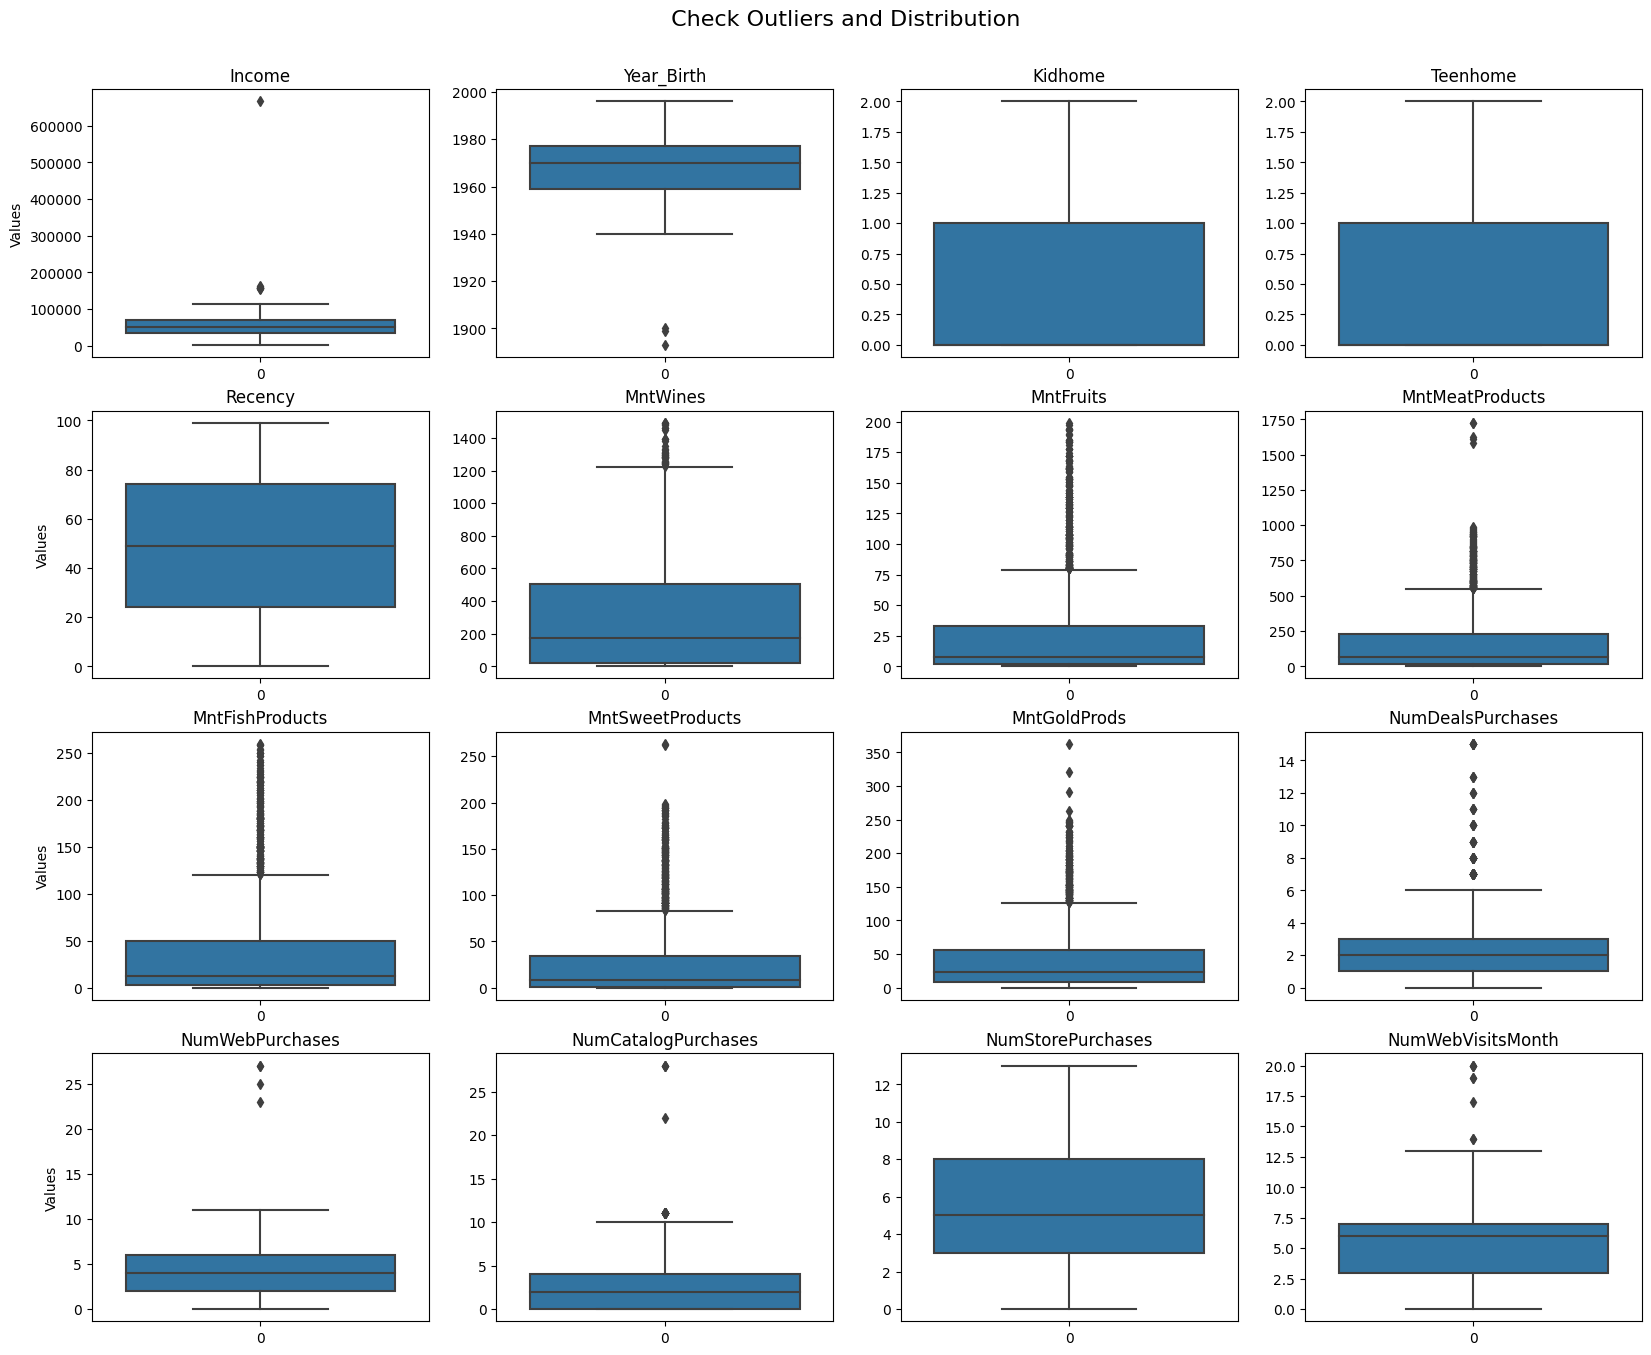

In [14]:
# Membuat Boxplot dari seluruh data yang numeric
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df, columns_list=df_numeric, rows=4, cols=4, suptitle=' Check Outliers and Distribution')

**Kesimpulan dari Hasil Boxplot Diatas**
1. Dari Hasil Boxplot diatas dapat kita pastikan bahwa seluruh data numeric yang kita punya ini tidak berdistribusi Normal melainkan hanya pada Kolom NumStorePurchases dan Recency yang harus dipastikan dengan melakukan Uji Normalitas.
2. **Pada kolom Income terdapat 1 Customer yang memiliki Income yang sangat jauh dari rata-rata yaitu sekitar 600.000 dan dianggap sebagai Outliers**
3. **Pada kolo Year Birth terdapat Customer yang lahir dibawah tahun 1920, dan dianggap sebagai Outliers** 
4. Untuk Outliers selain kolom Income dan Year Birth saya biarkan , karena saya asumsikan bahwa itu merupakan pembelian yang dilakukan Customer jadi mungkin saja bahwa ada Customer yang melakukan total transaksi jauh diatas rata-rata.

In [15]:
# Cek Outliers yang ada pada kolom Income
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


Dari hasil Cek diatas kita sudah menemukan nomer index pada baris yang memiliki Income sangat jauh diatas rata-rata

In [16]:
# Cek Outliers yang ada pada kolom Year Birth
df[df['Year_Birth']<1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,26-09-2013,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


Dari hasil Cek diatas kita sudah menemukan nomer index pada baris yang memiliki Year_Birth yang sangat jauh dibawah rata-rata

### **Delete Outliers**

In [17]:
# Delete Outliers dikolom Income berdasarkan nomer Index
df.drop(2233,axis=0,inplace=True)

In [18]:
# Delete Outliers dikolom Year_Birth berdasarkan nomer Index
df.drop(192,axis=0,inplace=True)
df.drop(239,axis=0,inplace=True)
df.drop(339,axis=0,inplace=True)

Text(0.5, 1.0, 'Income')

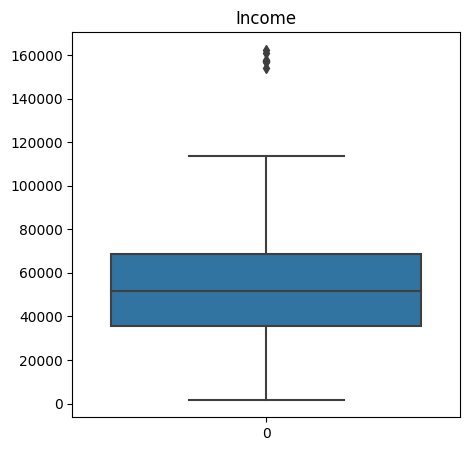

In [19]:
# Membuat Boxplot pada kolom Income
plt.figure(figsize=(5,5))
sns.boxplot(
    df['Income']
)
plt.title('Income')

Berdasarkan Boxplot pada Kolom Income diatas masih terdapat Outliers dan Data tidak berdistribusi dengan normal dan sebaran datanya Right Skewed

In [20]:
# Cek outliers yang tersisa pada kolom Income
df[df['Income']>120000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,0,1725,2,1,1,0,0,28,0,1,0,0,0,0,0,0,3,11,0
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,3,11,0


Dari Tabel diatas saya asumsikan bahwa dari ke 7 pelanggan tersebut memang memiliki pendapatan lebih tinggi diatas rata2

### **Mengisi Missing Value**

Sebelumnya kita sudah mengetahui bahwa terdapat missing value pada kolom income dan telah melakukan delete duplicated value serta delete outliers. selanjutnya kita akan mengisi missing value tersebut dengan menggunakan median karena dari boxplot numerical sebelumnya sudah terlihat bahwa Distribusi pada kolom Income tidak berdistribusi dengan normal dan berbentuk ***Right Skewed***.

In [21]:
# Melihat Median dari Income berdasarkan Education
median_values = df.groupby('Education')['Income'].median()
median_values

Education
2n Cycle      46772.0
Basic         20194.0
Graduation    52332.0
Master        51044.5
PhD           55236.0
Name: Income, dtype: float64

Diatas adalah hasil Median dari kolom Income berdasarkan Education yang dimiliki oleh Customer

In [22]:
# Mengisi Missing Values berdasarkan Median Income tiap Education
for edu, median in median_values.items():
    df.loc[(df['Income'].isna()) & (df['Education'] == edu), 'Income'] = median

Mengisi Missing Value dengan Median dari kolom Income Berdasarkan Education yang dimiliki oleh Customer

In [23]:
# Cek Missing Value pada Kolom Income
df['Income'].isna().sum()

0

Sudah tidak ada Missing Value dikolom Income

### **Tambah Kolom**

Setelah data sudah bersih dari Outliers,Duplicated dan Missing Value selanjutnya adalah melakukan penambahan kolom

In [24]:
# Menambah Kolom Total Amount
total_amount= df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.insert(loc=15, column='Total_Amount', value=total_amount)

Menambah Kolom Total_Amount dengan menambahkan semua amount yang dikeluarkan oleh pelanggan dari setiap kategori produk agar kita dapat mengetahui Total Amount keseluruhan yang dikeluarkan oleh setiap pelanggan di Supermarket.

In [25]:
# Menambah Kolom Frequensi pembelian yang dilakukan Customer
df.insert(loc=21, column='Freq_Purchases', value= df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumWebPurchases'])

Menambahkan Kolom Freq_Purchases untuk melihat total frekuensi pembelian yang dilakukan oleh Customer diSupermarket berdasarkan pembelian yang dilakukan dari 3 channel pembelian Supermarket yaitu Catalogue, Store dan Web

### **Ubah Tipe Data DT_Customer**

In [26]:
# Mengubah Tipe Data Dt_Customer menjadi Date Time
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Mengubah tipe data pada kolom Dt_Customer yang sebelumnya tipe datanya adalah Object menjadi Datetime

### **Delete Kolom Z_CostContact dan Z_Revenue**

In [27]:
# Melihat Value Count yang ada pada kolom Z_CostContact dan Z_Revenue 
display(df['Z_CostContact'].value_counts())
df['Z_Revenue'].value_counts()

Z_CostContact
3    2035
Name: count, dtype: int64

Z_Revenue
11    2035
Name: count, dtype: int64

Dari hasil value count tersebut kita dapat melihat bahwa seluruh nilai dikolom Z_CostContact dan Z_Revenue sama semua ditiap barisnya
sehingga dapat disimpulkan bahwa kolom tersebut tidak memiliki hubungan dengan kolom2 yang lainnya.

In [28]:
# Menghapus Kolom Z_CostContact dan Z_Revenue
df.drop('Z_CostContact', axis=1, inplace=True)
df.drop('Z_Revenue', axis=1, inplace=True)

In [29]:
# Cek kolom yang ada pada dataframe
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Amount', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Freq_Purchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

Kolom Z_CostContact dan Z_Revenue sudah terhapus.

### **Merubah Value pada kolom Marital Status**

In [30]:
# Cek Unique Value pada kolom Marital Status
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    515
Single      444
Divorced    212
Widow        70
Alone         3
Absurd        2
YOLO          1
Name: count, dtype: int64

Merubah Nilai Kategori pada Kolom Marital Status
1. Alone menjadi Single (terdapat 3 baris)
2. Absurd menjadi Together (terdapat 2 baris)
3. YOLO menjadi Single (terdapat 1 baris)
4. Widow menjadi Divorced

In [31]:
# Merubah nilai Alone dan Yolo menjadi Single
df['Marital_Status'].replace('Alone', 'Single', inplace=True)
df['Marital_Status'].replace('YOLO', 'Single', inplace=True)
# Merubah nilai Absurd menjadi Together
df['Marital_Status'].replace('Absurd', 'Together', inplace=True)
# Merubah nilai Widow menjadi Divorced
df['Marital_Status'].replace('Widow', 'Divorced', inplace=True)
df['Marital_Status'].value_counts()

Marital_Status
Married     788
Together    517
Single      448
Divorced    282
Name: count, dtype: int64

### **Merubah Value pada kolom Education**

In [32]:
# Melihat total pengulangan nilai Unique pada kolom Education
df['Education'].value_counts()

Education
Graduation    1024
PhD            441
Master         337
2n Cycle       184
Basic           49
Name: count, dtype: int64

Merubah nilai kategori 2n Cycle menjadi master pada kolom Education karena dalam beberapa sistem pendidikan, 2n Cycle sangat mirip dengan tingkat Master dalam hal kurikulum dan pendidikan yang diberikan.

In [33]:
# Merubah nilai 2n Cycle menjadi Master
df['Education'].replace('2n Cycle', 'Master', inplace=True)
# Melihat total pengulangan nilai Unique pada kolom Education setelah ada perubahan
df['Education'].value_counts()

Education
Graduation    1024
Master         521
PhD            441
Basic           49
Name: count, dtype: int64

### **Tambah Kolom Generation**

Karena pada Dataset tidak diberitahukan rentang dataset pasti maka kita tidak dapat mengetahui umur pasti dari Customer melainkan hanya pada tahun lahir Customer , oleh karena itu saya membuat Kolom baru yang bernama Generation untuk mengkategorikan tahun lahir Customer berdasarkan Generasi
1. Pre Boomer : Kelahiran sebelum tahun 1946
1. Baby Boomer: Kelahiran sekitar tahun 1946 hingga 1964.
2. Generasi X: Kelahiran sekitar tahun 1965 hingga 1980.
3. Generasi Y (Millennials): Kelahiran sekitar tahun 1981 hingga 1996.
4. Generasi Z: Kelahiran setelah tahun 1996.
- Source : https://uici.ac.id/mengenal-6-macam-generasi-di-indonesia-sesuai-tahun-lahir-kamu-termasuk-yang-mana/#:~:text=Pre%2DBoomer%20merupakan%20generasi%20yang,masih%20dalam%20jajahan%20bangsa%20lain.

In [34]:
# Menambah kolom Generation
df['Generation'] = pd.cut(df['Year_Birth'], bins=[1939, 1945, 1964, 1980, 1996,], 
                          labels=['Pre Boomer', 'Baby Boomer', 'Generasi X', 'Millennials'])
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,0,0,0,0,0,0,1,Baby Boomer
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,0,0,0,0,0,0,0,Baby Boomer
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,0,0,0,0,0,0,0,Generasi X
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,0,0,0,0,0,0,0,Millennials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,0,0,0,0,0,0,0,Millennials
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,0,0,0,0,0,0,0,Generasi X
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,0,1,0,0,0,0,0,Millennials
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,0,0,0,0,0,0,0,Baby Boomer


In [35]:
# Melihat Nilai Unique beserta total pengulangannya yang ada pada kolom Generation
df['Generation'].value_counts()

Generation
Generasi X     974
Baby Boomer    691
Millennials    347
Pre Boomer      23
Name: count, dtype: int64

### **Tambah Kolom Income_Category**

Menambahkan kolom Income_Category untuk melakukan pengkategorian pelanggan berdasarkan Income

In [36]:
# Menampilkan Uji Statistik Deskriptif pada kolom Income
df['Income'].describe()

count      2035.000000
mean      52044.134398
std       21488.281598
min        1730.000000
25%       35694.500000
50%       51650.000000
75%       68277.500000
max      162397.000000
Name: Income, dtype: float64

Berdasarkan Statistik Deskriptif pada kolom Income diatas maka saya melakukan pengelompokan kategori Income berdasarkan range dari quartal pada statistik sebagai berikut :
1. Low = Income yang dalam rentang 1730 sampai 35694 
2. Middle = Income yang dalam rentang 35694 sampai 51650
3. High = Income yang dalam rentang 51650 sampai 68277.5
4. Very High = 68277.5 sampai 162397

In [37]:
# Membuat fungsi untuk membuat kolom baru Income Category
def income_category(income):
    if income <= 35694:
        return 'Low'
    elif income <= 51650:
        return 'Middle'
    elif income <= 68277.5:
        return 'High'
    else:
        return 'Very High'

df['Income_Category'] = df['Income'].apply(income_category)


In [38]:
# Cek Value Count pada kolom Income Categpry
df['Income_Category'].value_counts()

Income_Category
Middle       509
Very High    509
Low          509
High         508
Name: count, dtype: int64

### **Ringkasan dari Data Cleaning & Preparation**
1. Cek Duplicated Values dan Delete Duplicated Values.
2. Cek Outliers dan Delete Outliers.
3. Cek Missing Values pada kolom Income dengan nilai Median dari setiap Education.
4. Menambah Kolom Total Amount yang nilainya adalah penambahan dari seluruh amount yang dikeluarkan disetiap kategori produk oleh Customer.
5. Menambah Kolom Frequency Purchases yang nilainya adalah total dari ketiga tempat pembelian (Store,Web,dan Catalogue) yang telah        dilakukan oleh Customer.
6. Menghapus Kolom Z Cost Contact dan Z Revenue karena tidak diketahui Nilai nya dan seluruh baris memiliki nilai yang sama sehingga tidak ada hubungan dengan kolom kolom yang lainnya.
7. Mengganti nilai yang ada pada Marital Status.
8. Mengganti nilai yang ada pada Education.
8. Menambah Kolom Generation untuk mengkategorikan Tahun lahir dari setiap Customer.


|Nama Kolom Tambahan| Keterangan|
|----------|------------|
|Total_Amount | Total Pengeluaran Customer|
|Generation | Generasi berdasarkan tahun lahir|
|Freq_Purchases | Frekuensi pembelian yang sudah dilakukan customer disemua Channel Supermarket|
|Income_Category | Kategori berdasarkan pendapatan Customer|

# **Data Analysis**

## **General**

In [39]:
# Menampilkan dataset yang sudah bersih
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Category
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,...,3,8,10,4,7,22,0,0,0,0,0,0,1,Baby Boomer,High
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,...,2,1,1,2,5,4,0,0,0,0,0,0,0,Baby Boomer,Middle
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,...,1,8,2,10,4,20,0,0,0,0,0,0,0,Generasi X,Very High
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,...,2,2,0,4,6,6,0,0,0,0,0,0,0,Millennials,Low
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,...,5,5,3,6,5,14,0,0,0,0,0,0,0,Millennials,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,...,1,0,0,3,4,3,0,0,0,0,0,0,0,Millennials,Low
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,...,2,9,3,4,5,16,0,0,0,0,0,0,0,Generasi X,High
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,...,1,2,3,13,6,18,0,1,0,0,0,0,0,Millennials,High
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,...,2,6,5,10,3,21,0,0,0,0,0,0,0,Baby Boomer,Very High


Data yang sudah bersih terdapat 2035 baris dan 31 kolom

**Uji Normalitas pada kolom Total_Amount**

In [40]:
# membuat variabel baru untuk uji normalitas
income_data = df['Total_Amount']

# Membandingkannya dengan distribusi normal standar (mean=0, std=1)
expected_distribution = 'norm'

# Uji normalitias menggunakan KS test
ks_statistic, ks_p_value = ss.kstest(income_data, expected_distribution)

# tingkat signifikansi (alpha)
alpha = 0.05



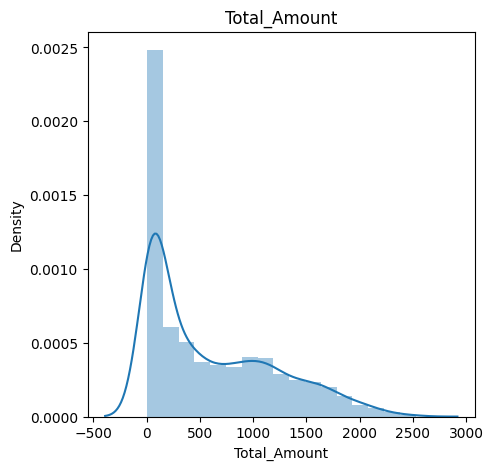

KS Statistic: 0.9999997133484281
P-value: 0.0
Tolak hipotesis nol: Data 'Total_Amount' tidak mengikuti distribusi normal


In [41]:
# Membuat distplot untuk melihat distribusi pada kolom Total Income
plt.figure(figsize=(5,5))
sns.distplot(df['Total_Amount'])
plt.title('Total_Amount')

plt.show()

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {ks_p_value}")
if ks_p_value < alpha:
    print("Tolak hipotesis nol: Data 'Total_Amount' tidak mengikuti distribusi normal")
else:
    print("Terima hipotesis nol: Data 'Total_Amount' mengikuti distribusi normal")

Berdasarkan distplot dari kolom Total Amount dapat disimpulkan bahwa Distribusi sebaran data pada kolom income tidak normal dan berbentuk right Skewed atau positively skewed.

### **Statistik Deskriptif**

**Melakukan Statistik Deskriptif terhadap seluruh Kategori Produk dan Total Amount**

In [42]:
# Membuat Statistik Deskriptif seluruh kategori produk dan Total Amount
df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Amount']].describe().round(2).transpose().sort_values(by='50%',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Total_Amount,2035.0,606.08,601.67,5.0,69.0,396.0,1044.5,2525.0
MntWines,2035.0,303.54,335.82,0.0,23.0,175.0,503.5,1493.0
MntMeatProducts,2035.0,167.79,227.91,0.0,16.0,68.0,230.0,1725.0
MntGoldProds,2035.0,43.72,51.91,0.0,9.0,24.0,56.0,362.0
MntFishProducts,2035.0,37.47,54.73,0.0,3.0,12.0,50.0,259.0
MntFruits,2035.0,26.32,39.77,0.0,2.0,8.0,33.0,199.0
MntSweetProducts,2035.0,27.24,41.72,0.0,1.0,8.0,34.0,263.0


Kesimpulan:
1. Total Amount: Pelanggan memiliki rentang belanja yang sangat luas, dari $5 hingga $2525, dengan median sekitar $396.

2. Wines: Produk ini tampaknya sangat populer, dengan pembelian median sebesar $335 dan pembelian maksimum hingga $1493.

3. Meat Product: Meskipun median pembelian lebih rendah ($68), ada pelanggan yang menghabiskan hingga $1725 pada produk ini.

4. Gold Product: Median pembelian adalah $24, dengan pembelian maksimum hingga $362.

5. Fish Product: Tampaknya kurang populer dibandingkan dengan Wine atau Meat, dengan median pembelian hanya $12.

6. Sweet Product: Seperti Fish Product, tampaknya kurang populer dengan median hanya $8.

7. Fruits: Sama seperti Sweet Product, Fruits juga memiliki median pembelian yang rendah, yaitu $8.



### **Uji Korelasi**

Melakukan Uji Korelasi pada seluruh Kategori yang ada diSupermarket dengan Total Amount yang dikeluarkan oleh Customer

In [43]:
# Membuat Uji Korelasi Spearman dari seluruh rata2 Amount of Product Category dan Total Amount
df_corr = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_Amount']].corr('spearman').transpose()
df_corr

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
MntWines,1.000000,0.516973,0.821130,0.523937,0.501804,0.574487,0.925351
MntFruits,0.516973,1.000000,0.713371,0.706495,0.688321,0.569511,0.682079
MntMeatProducts,0.821130,0.713371,1.000000,0.726135,0.695002,0.635479,0.939229
MntFishProducts,0.523937,0.706495,0.726135,1.000000,0.702383,0.561934,0.695297
MntSweetProducts,0.501804,0.688321,0.695002,0.702383,1.000000,0.542858,0.669762
MntGoldProds,0.574487,0.569511,0.635479,0.561934,0.542858,1.000000,0.691738
Total_Amount,0.925351,0.682079,0.939229,0.695297,0.669762,0.691738,1.000000


<Axes: >

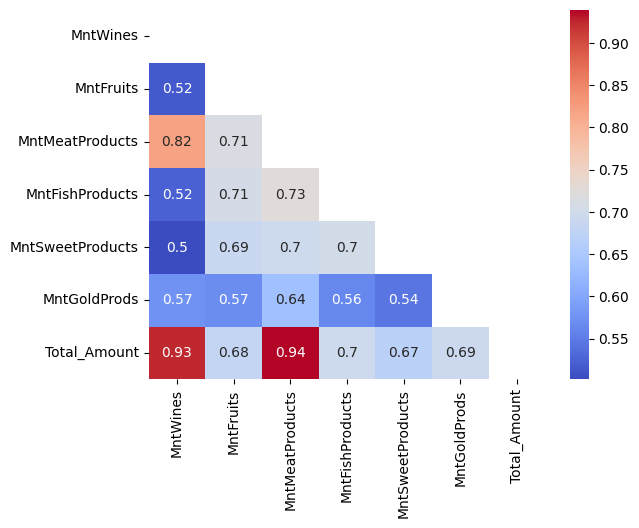

In [44]:
# Membuat Heatmap sebagai visual dari Uji Korelasi Spearman kepada setiap kategori Produk dan total amount
matrix = np.triu(df_corr)
sns.heatmap(
    data = df_corr,
    annot=True ,
    mask = matrix,
    cmap='coolwarm'
)

**Kesimpulan dari Uji Korelasi antara seluruh Kategori Produk dengan Total Amount**
1. Wine dan Total Pengeluaran: Ada korelasi yang sangat kuat antara pembelian Wine (MntWines) dan total pengeluaran (Total_Amount) dengan nilai korelasi 0.925. Ini menunjukkan bahwa pelanggan yang membeli Wine cenderung juga membeli produk lain dan menghabiskan lebih banyak uang secara keseluruhan.

2. Meat Products dan Total Pengeluaran: Ada korelasi yang sangat kuat antara Meat Products (MntMeatProducts) dan total pengeluaran dengan nilai korelasi 0.939, yang hampir mendekati 1. Ini menunjukkan bahwa produk daging juga sangat penting dalam menentukan total pengeluaran pelanggan.

3. Korelasi Antar Kategori Produk: Ada korelasi positif antara hampir semua kategori produk, menunjukkan bahwa pelanggan yang membeli satu jenis produk cenderung juga membeli jenis produk lain. Misalnya, Wine dan Meat Products memiliki korelasi sebesar 0.821.

In [45]:
# Melihat Customer yang tidak pernah membeli Wines dan Meat Product
display(df[df['MntWines']==0])
display(df[df['MntMeatProducts']==0])


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Category
136,5342,1976,Basic,Divorced,9548.0,1,0,2012-08-08,31,0,1,3,10,6,9,...,2,1,0,3,8,4,0,0,0,0,0,0,0,Generasi X,Low
233,9617,1951,Graduation,Single,15033.0,0,0,2014-04-16,37,0,4,5,6,0,4,...,1,1,0,3,3,4,0,0,0,0,0,0,0,Baby Boomer,Low
444,2106,1974,Master,Married,20130.0,0,0,2014-03-17,99,0,6,3,7,6,12,...,1,1,0,3,8,4,0,0,0,0,0,0,0,Generasi X,Low
445,10364,1959,Graduation,Divorced,23295.0,0,0,2013-07-13,72,0,0,1,2,12,5,...,1,1,0,2,8,3,0,0,0,0,0,0,0,Baby Boomer,Low
738,6516,1989,Basic,Married,17487.0,1,0,2013-03-18,37,0,0,1,7,4,6,...,1,1,0,2,7,3,0,0,0,0,0,0,0,Millennials,Low
862,9553,1987,Graduation,Married,7500.0,0,0,2013-01-09,94,0,2,3,4,1,5,...,1,0,0,3,6,3,0,0,0,0,0,0,0,Millennials,Low
893,9960,1991,Basic,Single,26868.0,1,0,2014-04-30,52,0,0,1,8,3,2,...,1,1,0,2,7,3,0,0,0,0,0,0,0,Millennials,Low
1170,193,1996,Basic,Married,14421.0,0,0,2014-02-17,81,0,0,2,3,3,8,...,1,1,0,2,5,3,1,0,0,0,0,0,0,Millennials,Low
1780,5150,1979,Basic,Single,20194.0,1,0,2012-12-17,64,0,4,7,11,10,15,...,2,2,0,3,6,5,0,0,0,0,0,0,0,Generasi X,Low
1861,10241,1975,Master,Divorced,11448.0,0,0,2013-12-15,16,0,0,0,6,2,6,...,1,1,0,2,6,3,0,0,0,0,0,0,0,Generasi X,Low


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Freq_Purchases,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Generation,Income_Category
1861,10241,1975,Master,Divorced,11448.0,0,0,2013-12-15,16,0,0,0,6,2,6,...,1,1,0,2,6,3,0,0,0,0,0,0,0,Generasi X,Low


Dari Tabel diatas dapat kita simpulkan bahwa :
1. Dari 2035 Customer hanya 12 Customer yang tidak pernah membeli Wines Product 
2. Dari 2035 Customer hanya 1 Customer yang tidak pernah membeli Meat Product

### **Uji Korelasi Diskon dengan Frekuensi dan Total Amount**

In [46]:
# Membuat Korelasi antara total pembelian dengan diskon, frekuensi dan total amount Customer
df[['NumDealsPurchases','Freq_Purchases','Total_Amount']].corr('spearman').transpose()

,NumDealsPurchases,Freq_Purchases,Total_Amount
NumDealsPurchases,1.000000,0.109374,-0.012411
Freq_Purchases,0.109374,1.000000,0.907371
Total_Amount,-0.012411,0.907371,1.000000


(NumDealsPurchases = total pembelian dengan diskon)

Berdasarkan hasil uji korelasi di atas maka dapat disimpulkan bahwa :
1. Nilai korelasi antara NumDealsPurchases dengan total amount sebesar 0.012411 yang artinya adalah Diskon tidak mempengaruhi mempengaruhi      Total Amount karena nilai korelasinya sangat kecil dan dekat dengan dengan 0
2. Nilai korelasi antara NumDealsPurchases dengan Freq_Purchases sebesar 0.109374 yang artinya adalah Diskon tidak terlalu mempengaruhi Frekuensi Pembelian karena nilai korelasi nya sangat kecil dan dekat dengan 0

Kesimpulan Tambahan:

1. Diskon tidak terlalu mempengaruhi total pengeluaran atau frekuensi pembelian, ini bisa menunjukkan bahwa strategi diskon atau penawaran khusus Supermarket mungkin perlu dievaluasi ulang.
2. Dapat dianggap bahwa pelanggan Supermarket tidak terlalu termotivasi oleh diskon saat membuat keputusan pembelian, yang berarti ada faktor lain yang lebih mempengaruhi keputusan mereka.



## **General**

### **Total Amount by Product Category in Supermarket**

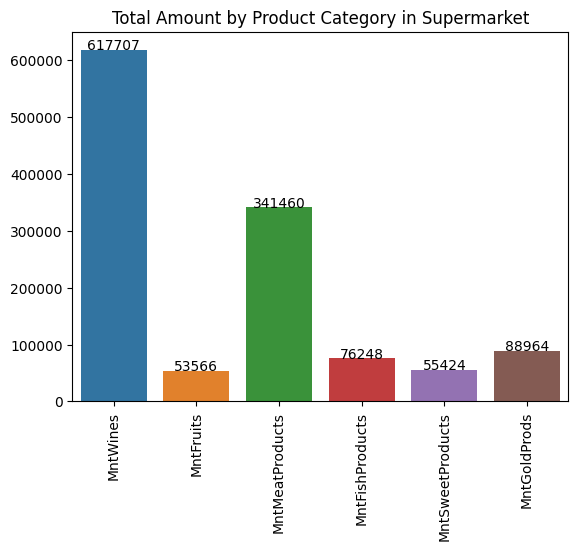

In [47]:
# Membuat variabel baru yang berisikan semua kategori produk
df_product = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']]
# Membuat Bar Chart
ax = sns.barplot(
    data=df_product,
    ci=0,
    estimator=np.sum
    )

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline')

# Judul dari Bar Chart
plt.title('Total Amount by Product Category in Supermarket')
plt.xticks(rotation=90)
plt.show()

Berdasarkan Bar Chart diatas dapat disimpulkan bahwa :
1. Pengeluaran Tertinggi di Kategori Wine: Berdasarkan data, pengeluaran tertinggi oleh pelanggan terjadi di kategori produk Wine, dengan total penjualan yang mencapai 617,707.

2. Kategori Meat sebagai Runner-Up: Kategori produk Meat menempati posisi kedua dengan total penjualan sebesar 341,460, menunjukkan minat pelanggan yang juga signifikan pada kategori ini.

3. Pengeluaran Menengah di Kategori Fish Product dan Gold Product: Kategori Fish Product dan Gold Product memiliki total penjualan sebesar 76,248 dan 88,964, menunjukkan bahwa kategori ini memiliki daya tarik menengah di antara pelanggan.

4. Pengeluaran Terendah di Kategori Buah dan Sweet: Kategori produk dengan total penjualan terendah adalah Buah dan Sweet, dengan angka sebesar 53,566 dan 55,244, menunjukkan bahwa kategori ini mungkin kurang menarik bagi pelanggan saat ini.

### **Acceptance of Marketing Campaigns Bar Chart**

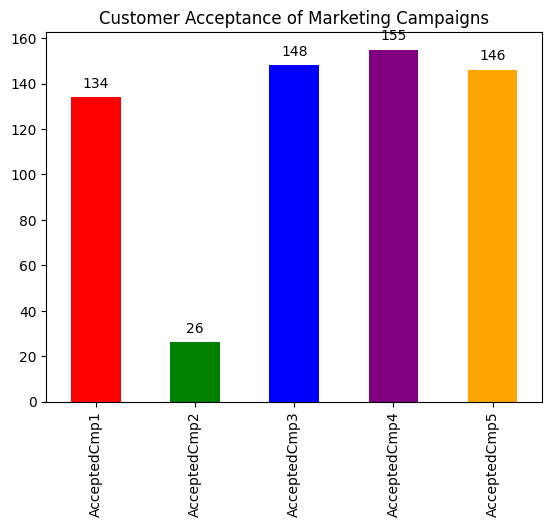

In [48]:
# List of colors
colors_list = ['red', 'green', 'blue', 'purple', 'orange']

# Create the bar chart and set colors
ax = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum().plot(kind='bar', color=colors_list)

# Annotate each bar with its value
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Add a title
plt.title('Customer Acceptance of Marketing Campaigns')

# Show the plot
plt.show()

Berdasarkan kolom total campaign yang diterima oleh Customer diatas dapat disimpulkan bahwa :
1. Kampanye Paling Efektif: AcceptedCmp4 adalah kampanye dengan penerimaan tertinggi, diikuti oleh AcceptedCmp3, AcceptedCmp5 dan AcceptedCmp1.
2. Kampanye Kurang Efektif: AcceptedCmp2 adalah kampanye dengan penerimaan terendah, yang mungkin menunjukkan bahwa kampanye ini kurang sesuai dengan minat pelanggan.

### **Proportion of Purchase Channels in Supermarkets**

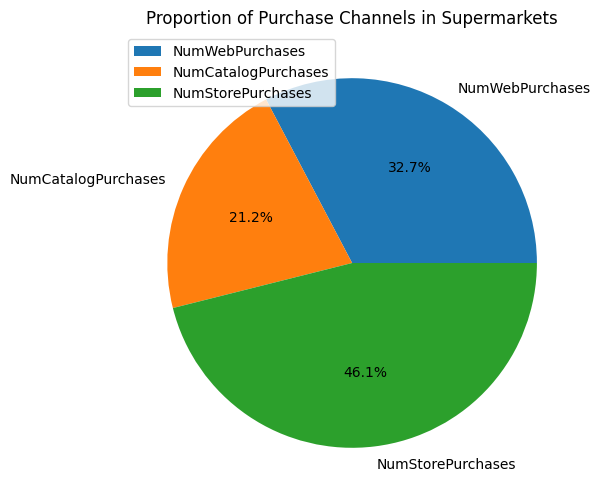

In [49]:
# Membuat Pie Chart total tempat pembelian oleh customer
plt.figure(figsize=(6,6))
df[[ 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].sum().plot(kind='pie',autopct='%1.1f%%')
# Membuat Judul Pie Chart
plt.title('Proportion of Purchase Channels in Supermarkets')
# Menampilkan Legenda
plt.legend(loc='upper left')
plt.show()

Berdasarkan Pie Chart Distribusi dari pembelian di ketiga channel yang dilakukan oleh Customer diatas dapat disimpulkan :

1. Store: Sebagai saluran dengan proporsi pembelian terbesar (46.1%), ini menunjukkan bahwa toko fisik masih menjadi pilihan utama bagi pelanggan Supermarket.

2. Web: Dengan proporsi 32.7%, pembelian online juga menjadi saluran yang cukup populer, menunjukkan kecenderungan konsumen yang semakin digital.

3. Catalogue: Meskipun memiliki proporsi lebih kecil (21.2%), katalog masih menjadi saluran yang relevan dan mungkin menarik bagi segmen pelanggan tertentu.

Rekomendasi:

1. Optimalkan Pengalaman Toko: Mengingat banyaknya pelanggan yang lebih suka berbelanja di toko, memastikan pengalaman berbelanja yang menyenangkan di toko fisik bisa menjadi prioritas.

2. Tingkatkan Web Experience: Dengan hampir sepertiga pembelian dilakukan secara online, investasi lebih lanjut dalam UX dan UI website bisa sangat bermanfaat.

3. Personalisasi Katalog: Untuk 21.2% pelanggan yang berbelanja melalui katalog, pertimbangkan untuk menawarkan katalog yang lebih terpersonalisasi berdasarkan preferensi pelanggan.

### **Customer Enrollment Trend**

In [50]:
# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts = df.resample('M', on='Dt_Customer').size()

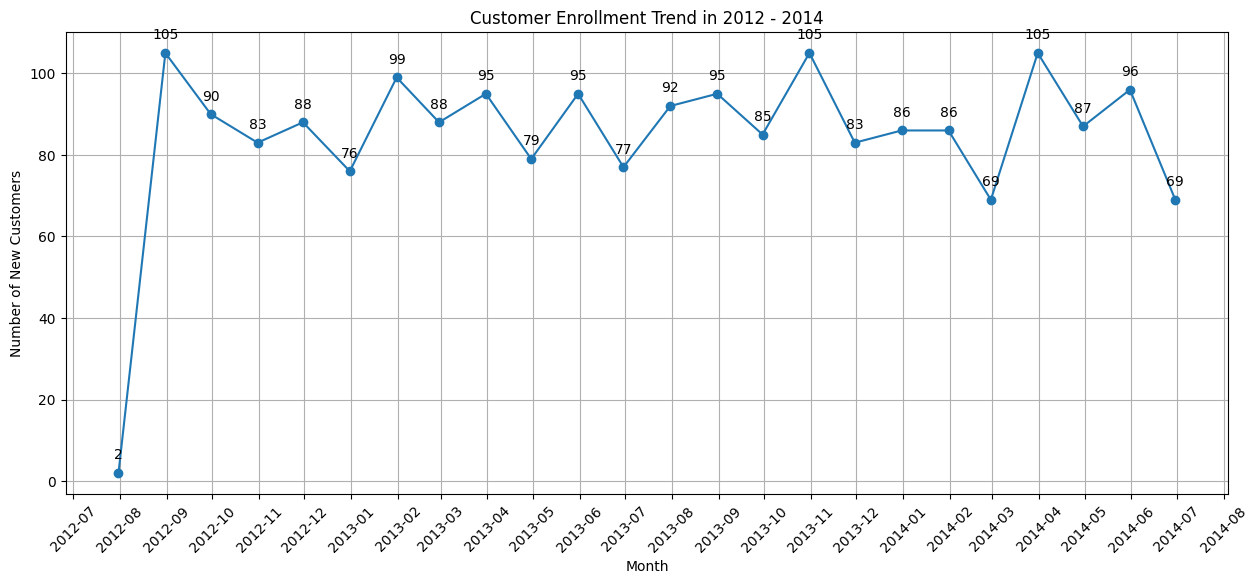

In [51]:
import matplotlib.dates as mdates
# Mengelompokkan per bulan dan menghitung jumlah pelanggan
monthly_counts_all = monthly_counts.loc['2012-01-01':'2014-12-31']

plt.figure(figsize=(15,6))

# Membuat plot
plt.plot(monthly_counts_all.index, monthly_counts_all.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.title('Customer Enrollment Trend in 2012 - 2014')

# Menambahkan anotasi untuk setiap titik
for i, value in enumerate(monthly_counts_all.values):
    plt.annotate(str(value), (mdates.date2num(monthly_counts_all.index[i]), value), textcoords="offset points", xytext=(0,10), ha='center')

# Mengatur label sumbu x untuk menampilkan setiap bulan
plt.xticks(ticks=monthly_counts_all.index, labels=[x.strftime('%Y-%m') for x in monthly_counts_all.index], rotation=45)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.grid(True)
plt.show()

Kesimpulan:
1. Tren Pendaftaran: Ada variasi dalam jumlah pendaftaran pelanggan dari bulan ke bulan, tetapi tidak ada pola jelas yang terlihat hanya dari data ini.
2. Pendaftaran Tertinggi: Ada beberapa bulan dengan pendaftaran yang lebih tinggi, seperti Agustus 2012 dan Oktober 2013, masing-masing dengan 105 pendaftaran.
3. Pendaftaran Terendah: Februari 2014 menunjukkan pendaftaran terendah dengan hanya 69 pelanggan baru.

Rekomendasi:
1. Analisis Musiman: Jika ada data tambahan mungkin bisa dilakukan untuk melakukan analisis musiman untuk melihat apakah ada pola musiman dalam pendaftaran pelanggan.

### **Pie Chart Of Customers Complain**

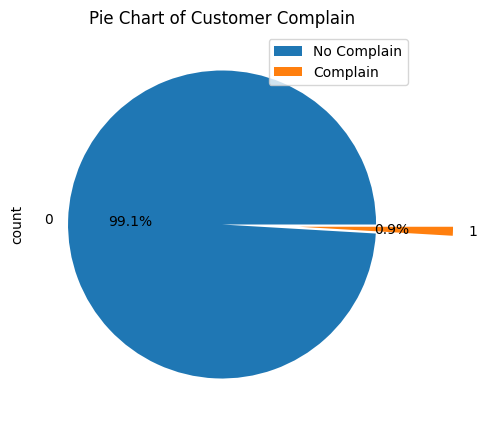

In [52]:
# Membuat Pie Chart of Customers Complain
plt.figure(figsize=(5,5))
df['Complain'].value_counts().plot(kind='pie',autopct='%1.1f%%',explode=((0.00,0.5)))
plt.title('Pie Chart of Customer Complain')
plt.legend(('No Complain','Complain'))
plt.show()

Kesimpulan :
Dari proporsi Pie Chart Of Customers Complain diatas terlihat bahwa hasilnya adalah 0,9% yang pernah mengajukan complain
Artinya adalah layanan yang telah dilakukan Supermarket sudah baik sehingga sangat sedikit pelanggan yang melakukan complain.

Rekomendasi:
Analisis Keluhan: Walaupun jumlahnya sedikit, tetap penting untuk menganalisis keluhan yang ada untuk mendapatkan wawasan tentang aspek mana yang mungkin perlu ditingkatkan.

## **Analysis Berdasarkan Marital Status**

### **Proporsi Customer Berdasarkan Marital Status**

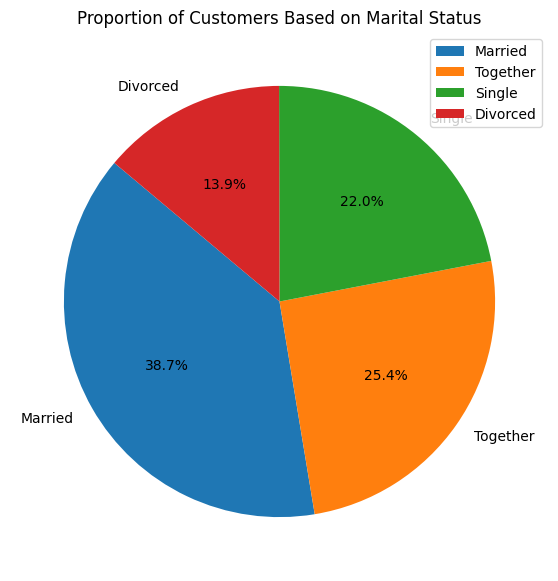

In [53]:
# Membuat diagram lingkaran untuk distribusi kategori pendidikan
plt.figure(figsize=(7, 7))
education_counts = df['Marital_Status'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers Based on Marital Status')
plt.legend()
plt.show()

Berdasarkan Pie Chart Distribusi dari Marital Status diatas dapat disimpulkan bahwa :
1. Proporsi Marital Status Customer paling banyak adalah Married yaitu sebesar 38,7%
2. Proposi Marital status paling sedikit adalah Divorced yaitu sebesar 13,9%

### **Distribusi Income Category Berdasarkan Marital Status** 

In [54]:
# Membuat Value Counts pada Income Category berdasarkan Marital Status
df[['Marital_Status','Income_Category']].groupby('Marital_Status').value_counts()

Marital_Status  Income_Category
Divorced        High                79
                Middle              73
                Very High           73
                Low                 57
Married         High               204
                Low                197
                Very High          196
                Middle             191
Single          Low                124
                Middle             117
                Very High          112
                High                95
Together        Low                131
                High               130
                Middle             128
                Very High          128
Name: count, dtype: int64

Married & High Income: Dengan 204 pelanggan, ini adalah segmen terbesar didalam Supermarket. Ini menunjukkan bahwa pelanggan yang menikah dengan pendapatan tinggi dapat dijadikan target utama dari Supermarket.

### **Tabel Rata-Rata Pengeluaran Berdasarkan Marital Status**

In [55]:
# Melakukan agregating median dari total pengeluaran disetiap kategori produk berdasarkan Marital Status
df[['Marital_Status','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Marital_Status').median().reset_index().sort_values(by='Total_Amount',ascending=False)

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
0,Divorced,207.0,10.0,75.5,12.5,8.5,27.5,502.0
1,Married,179.0,7.0,65.5,12.0,8.0,22.0,404.0
3,Together,174.0,8.0,67.0,12.0,8.0,22.0,380.0
2,Single,154.0,8.0,60.5,12.0,9.0,26.0,361.0


Berdasarkan tabel agregasi pada Marital Status diatas dapat disimpulkan bahwa :
1. Divorced : Pelanggan yang bercerai tampaknya menghabiskan paling banyak pada wine, dengan median sekitar 207.0 

2. Seluruh Marital Status paling banyak melakukan pengeluaran pada kategori Wine

3. Untuk pengeluaran terbesar kedua terdapat pada kategori Meat


### **Median Total Pengeluaran Berdasarkan Tingkat Pendidikan**

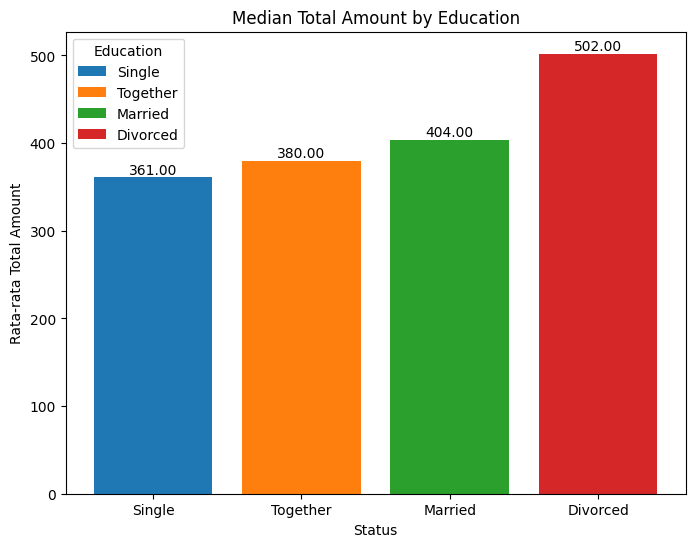

In [56]:
# Membuat bar rata-rata pembayaran yang dikeluarkan oleh setiap Education
plt.figure(figsize=(8, 6))

education_groups = df['Marital_Status'].unique()
for education in education_groups:
    subset = df[df['Marital_Status'] == education]
    median_value = subset['Total_Amount'].median()
    plt.bar(education, median_value, label=education)
    
    # Menambahkan angka tepatnya di atas setiap bar
    plt.text(education, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median Total Amount by Education')
plt.xlabel('Status')
plt.ylabel('Rata-rata Total Amount')
plt.legend(title='Education')  
plt.show()

Berdasarkan pada Tabel diatas dapat disimpulkan bahwa :
1. Divorced Customers: Dengan Median Total Amount sebesar 502 USD, pelanggan ini tampaknya paling banyak menghabiskan uang di supermarket. Ini bisa menjadi indikasi bahwa segmen ini mungkin lebih terbuka untuk membeli produk premium atau dalam jumlah besar.

2. Married Customers: Dengan Median Total Amount sebesar 404 USD, pelanggan ini juga merupakan kontributor signifikan untuk pendapatan Supermarket. Memiliki strategi retensi dan up-selling yang efektif bisa sangat bermanfaat untuk segmen ini.

3. Together Customers: Dengan Median Total Amount sebesar 380 USD, pelanggan yang hidup bersama ini cenderung dekat dengan pelanggan yang menikah dalam hal pengeluaran. Ini menunjukkan bahwa meskipun mereka belum menikah, pola belanja mereka cukup mirip.

4. Single Customers: Dengan Median Total Amount terendah, sebesar 361 USD, pelanggan ini mungkin lebih selektif dalam pembelian mereka. Strategi seperti diskon atau promosi mungkin lebih efektif untuk segmen ini.

### **Tabel Campaign yang diterima Berdasarkan Marital Status**

In [57]:
# Membuat agregating total campaign yang diterima berdasarkan Marital Status
df[['Marital_Status','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Marital_Status').sum().reset_index()

,Marital_Status,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Divorced,16,6,18,27,20
1,Married,59,6,57,59,59
2,Single,30,5,39,30,28
3,Together,29,9,34,39,39


Dari tabel Agregating tiap Campaign berdasarkan Marital Status dapat disimpulkan bahwa :
1. Martial Status Customer yang Married paling banyak menerima kampanye
2. AcceptedCmp2 (Campaign 2) tampaknya kurang efektif di semua segmen pelanggan dibandingkan dengan kampanye lainnya.

saran :
1. Target Married Customers: Mengingat responsivitas mereka yang tinggi, pertimbangkan untuk melakukan lebih banyak kampanye yang dirancang khusus untuk pelanggan menikah.
2. Reevaluate AcceptedCmp2: Pertimbangkan untuk mengevaluasi ulang atau mengoptimalkan kampanye ini, karena tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis Berdasarkan Education**

### **Proporsi Tingkat Pendidikan Pelanggan disupermarket**

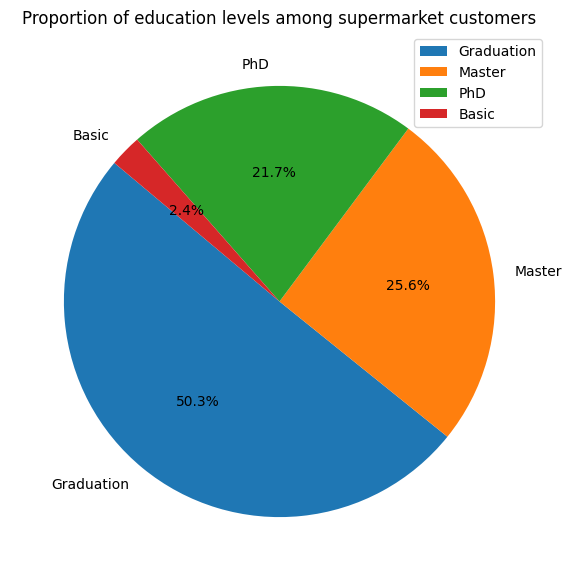

In [58]:
# Membuat diagram lingkaran untuk distribusi kategori pendidikan
plt.figure(figsize=(7, 7))
education_counts = df['Education'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of education levels among supermarket customers')
plt.legend()
plt.show()

Dari hasil Pie Chart diatas dapat kita simpulkan :
1. 50% dari keseluruhan distribusi tingkat pendidikan yang dimiliki Customer adalah Graduation
2. Pelanggan yang tingkat pendidikannya Basic merupakan distribusi yang paling sedikit  2.4%

### **Distribusi Income Category berdasarkan Tingkat Pendidikan**

In [59]:
# Melakukan Value Counts Income Category berdasarkan Generation
df[['Education','Income_Category']].groupby('Education').value_counts()

Education   Income_Category
Basic       Low                 49
Graduation  Very High          277
            Low                257
            High               249
            Middle             241
Master      Middle             149
            Low                135
            High               122
            Very High          115
PhD         High               137
            Middle             119
            Very High          117
            Low                 68
Name: count, dtype: int64

Graduation & Very High Income: Dengan 277 pelanggan, ini adalah segmen terbesar. Ini menunjukkan bahwa pelanggan dengan pendidikan "Graduation" dan pendapatan "Very High" bisa menjadi target utama Supermarket.

### **Bar Chart Median Total Pengeluaran Berdasarkan Tingkat Pendidikan**

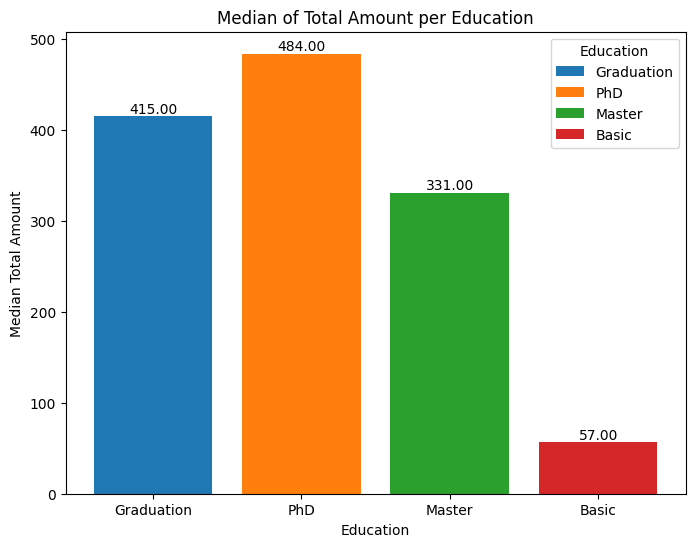

In [60]:
# Membuat bar rata-rata pembayaran yang dikeluarkan oleh setiap Education
plt.figure(figsize=(8, 6))

education_groups = df['Education'].unique()
for education in education_groups:
    subset = df[df['Education'] == education]
    median_value = subset['Total_Amount'].median()
    plt.bar(education, median_value, label=education)
    
    # Menambahkan angka tepatnya di atas setiap bar
    plt.text(education, median_value, f'{median_value:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Median of Total Amount per Education')
plt.xlabel('Education')
plt.ylabel('Median Total Amount')
plt.legend(title='Education')  
plt.show()


Dari Bar Chart diatas dapat kita simpulkan bahwa :
1. Customer yang memiliki gelar PhD memiliki nilai median Total Pengeluaran tertinggi yaitu sebesar 484 $
2. Customer yang memiliki gelar Basic memiliki nilai mediam Total Pengeluaran terendah yaitu sebesar 57 $

### **Tabel Rata-Rata Pengeluaran Berdasarkan Tingkat Pendidikan**

In [61]:
# Membuat Agregasi Median setiap kategori produk berdasarkan Education
df[['Education','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Education').median().reset_index().sort_values(by='Total_Amount',ascending=False)

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
3,PhD,267.0,4.0,69.0,6.0,3.0,16.0,484.0
1,Graduation,184.0,10.0,81.5,15.0,12.0,29.0,415.0
2,Master,146.0,8.0,60.0,12.0,8.0,23.0,331.0
0,Basic,2.0,7.0,7.0,10.0,7.0,15.0,57.0


**Kesimpulan**

1. PhD: Pelanggan dengan tingkat pendidikan PhD cenderung menghabiskan uang paling banyak, khususnya pada kategori wine (MntWines) dengan rata-rata pengeluaran sekitar 267.0 USD. Total pengeluaran rata-rata adalah 484.0 USD.

2. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" juga menghabiskan cukup banyak, terutama pada kategori daging (MntMeatProducts) dan produk emas (MntGoldProds). Total pengeluaran rata-rata adalah 415.0 USD.

3. Master: Pelanggan ini memiliki pengeluaran yang lebih rendah dibandingkan dengan dua kategori di atas tetapi masih signifikan, dengan total rata-rata sekitar 331.0 USD.

4. Basic: Pelanggan dengan pendidikan dasar memiliki pengeluaran yang paling rendah di semua kategori. Total pengeluaran rata-rata adalah 57.0 USD.


### **Tabel Campaign yang diterima Berdasarkan Education**

In [62]:
# Membuat agregasi total setiap kampanye yang diterima berdasarkan Education
df[['Education','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Education').sum().reset_index()

,Education,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Basic,0,0,5,0,0
1,Graduation,77,14,72,76,76
2,Master,29,4,36,38,35
3,PhD,28,8,35,41,35


Kesimpulan:
1. Graduation: Pelanggan dengan tingkat pendidikan "Graduation" tampaknya paling responsif terhadap hampir semua kampanye pemasaran, dengan jumlah penerimaan berkisar antara 72 hingga 77. Ini konsisten dengan data pengeluaran mereka yang termasuk tinggi.

2. Master and PhD: Meskipun jumlahnya lebih kecil dibandingkan dengan "Graduation", pelanggan dengan tingkat pendidikan "Master" dan "PhD" juga menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Basic: sesuai dengan data pengeluaran, pelanggan dengan pendidikan dasar hampir tidak menunjukkan respons terhadap kampanye pemasaran, kecuali untuk AcceptedCmp3.

Rekomendasi:
1. Fokus pada Graduation: Mengingat responsivitas mereka yang tinggi, lebih banyak kampanye yang dirancang khusus untuk segmen ini bisa sangat efektif.

2. Optimalisasi untuk Master dan PhD: Untuk segmen ini, fokus pada kampanye yang telah terbukti efektif, seperti AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Evaluasi Kampanye: AcceptedCmp2 tampaknya kurang efektif di semua segmen pelanggan.

## **Analysis berdasarkan Generasi**

### **Proporsi Generasi Pelanggan Di Supermarket**

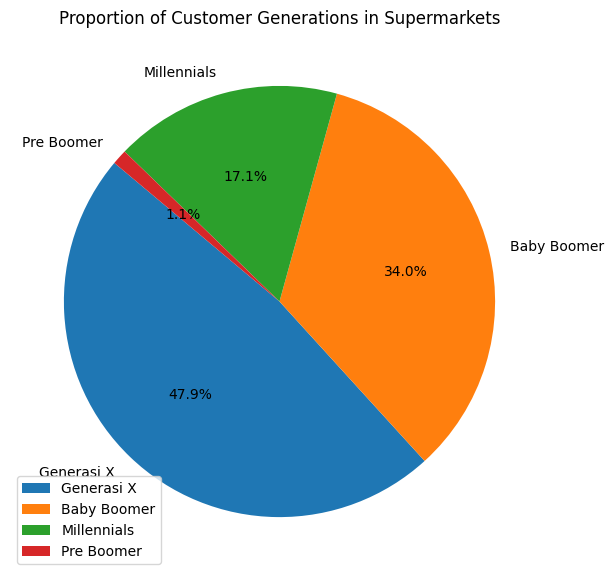

In [63]:
# Membuat Pie Chart untuk distribusi generasi
plt.figure(figsize=(7, 7))
education_counts = df['Generation'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customer Generations in Supermarkets')
plt.legend()
plt.show()

Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
1. Generasi X memiliki proporsi terbesar pada generasi customer yaitu sebesar 47.9 %
2. Generasi Baby Boomer juga memiliki proporsi yang lumayan besar di bawah Generasi X yaitu sebesar 33,4%
3. Genarasi Pre Boomer memiliki proporsi paling kecil yaitu hanya sebesar 1.1%

### **Distribusi Income Category Berdasarkan Generasi**

In [64]:
# Melakukan Agregating Income Category berdasarkan Generation
df[['Generation','Income_Category']].groupby('Generation').value_counts()

Generation   Income_Category
Pre Boomer   Very High           10
             High                 8
             Middle               5
             Low                  0
Baby Boomer  High               224
             Very High          197
             Middle             176
             Low                 94
Generasi X   Low                265
             Middle             258
             High               238
             Very High          213
Millennials  Low                150
             Very High           89
             Middle              70
             High                38
Name: count, dtype: int64

Kesimpulan :
1. Baby Boomer: Generasi ini cenderung memiliki pendapatan yang lebih tinggi, dengan 221 pelanggan berada dalam kategori "High" dan 193 pelanggan dalam kategori "Very High".

2. Generasi X: Meskipun ini adalah generasi dengan jumlah pelanggan terbanyak di kategori "Low" (265 pelanggan), mereka juga memiliki distribusi yang cukup merata di semua kategori pendapatan.

### **Median Total Pengeluaran berdasarkan Generasi**

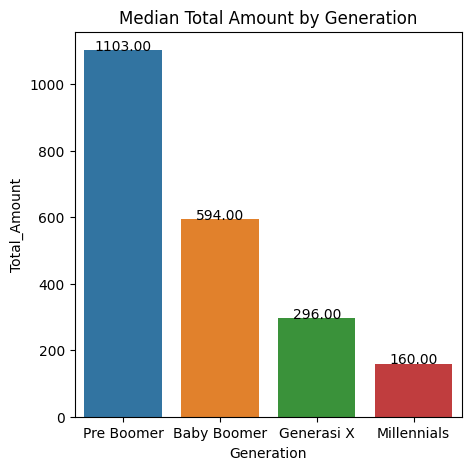

In [65]:
# Membuat Bar Chart Total pengeluaran dari setiap generasi
plt.figure(figsize=(5,5))
ax = sns.barplot(
    data=df,
    x='Generation',
    y='Total_Amount',
    estimator=np.median,
    ci=0
)
plt.title('Median Total Amount by Generation')
# Annotate each bar with its height
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='baseline'
    )
plt.show()

### **Tabel Rata Rata Pengeluaran berdasarkan Generasi**

In [66]:
# Membuat Agregasi Median setiap pengeluaran pada kategori produk berdasarkan Education
df[['Generation','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Generation').median().reset_index().sort_values(by='Total_Amount',ascending=False)

,Generation,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
0,Pre Boomer,508.0,38.0,249.0,55.0,23.0,26.0,1103.0
1,Baby Boomer,288.0,11.0,97.0,15.0,11.0,30.0,594.0
2,Generasi X,141.0,6.0,53.0,10.0,7.0,21.0,296.0
3,Millennials,46.0,8.0,46.0,12.0,9.0,22.0,160.0


Kesimpulan:
1. Pre Boomer: Generasi ini memiliki rata-rata pengeluaran tertinggi di hampir semua kategori produk, dengan total rata-rata pengeluaran sebesar 1103.0. Rata-rata pengeluaran tertinggi mereka adalah pada kategori produk Wine dengan 508.0, diikuti oleh produk Meat dengan 249.0.

2. Baby Boomer: Generasi ini memiliki rata-rata pengeluaran sebesar 594.0. Meski lebih rendah dibandingkan Pre Boomer, Baby Boomer memiliki rata-rata pengeluaran yang cukup tinggi untuk kategori produk Wine, yaitu 288.0.

3. Generasi X: Dengan rata-rata pengeluaran total sebesar 296.0, Generasi X memiliki rata-rata pengeluaran tertinggi untuk kategori produk Wine (141.0) dan produk Meat (53.0).

4. Millennials: Generasi ini memiliki rata-rata pengeluaran total yang paling rendah, yaitu 160.0. Namun, mereka menunjukkan kecenderungan yang hampir seimbang dalam rata-rata pengeluaran untuk kategori produk Wine, Meat, dan Fish dengan masing-masing 46.0, 46.0, dan 12.0.

Rekomendasi:
1. Produk Premium untuk Baby Boomer dan Pre Boomer: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, pertimbangkan untuk menawarkan produk atau layanan premium untuk generasi ini.

2. Varietas untuk Generasi X: Karena Generasi X memiliki pengeluaran yang lebih merata di berbagai kategori, bundling produk atau menawarkan variasi mungkin akan efektif.

3. Produk Terjangkau untuk Millennials: Fokus pada penawaran produk atau layanan yang lebih terjangkau.


### **Tabel Campaign yang diterima berdasarkan Generasi**

In [67]:
# Membuat agregasi total campaign yang diterima disetiap generasi
df[['Generation','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Generation').sum().reset_index()

,Generation,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,Pre Boomer,2,0,2,2,4
1,Baby Boomer,52,11,37,65,48
2,Generasi X,47,10,67,67,53
3,Millennials,33,5,42,21,41


Kesimpulan:
1. Pre Boomer: paling sedikit dalam menerima campaign tetapi dikarenakan populasi nya yang paling sedikit masih bisa dibilang memiliki responsivitas yang lumayan terhadap kampanye

2. Baby Boomer: menunjukkan responsivitas yang relatif tinggi terhadap kampanye, terutama pada AcceptedCmp1, AcceptedCmp3, AcceptedCmp4, dan AcceptedCmp5.

3. Generasi X : Menunjukan responsivitas tertinggi terhadap kampanye AcceptedCmp3 dan AcceptedCmp4


## **Analysis Berdasarkan Income Category**

### **Pie Chart Proporsi dari Income Category**

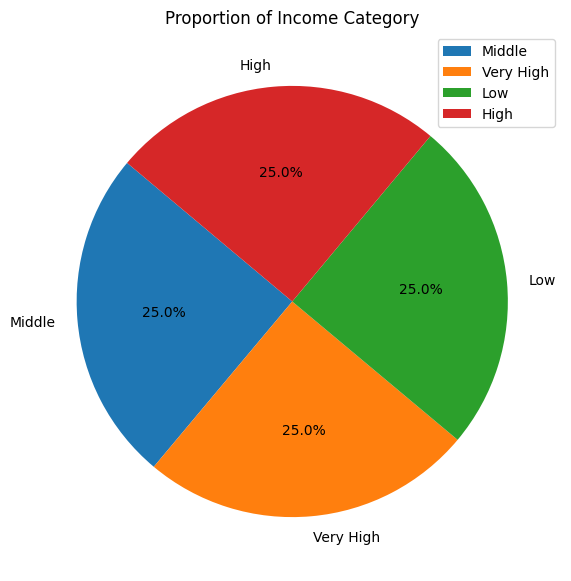

In [68]:
# Membuat diagram lingkaran untuk distribusi kategori Income
plt.figure(figsize=(7, 7))
education_counts = df['Income_Category'].value_counts()
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Income Category')
plt.legend()
plt.show()

Berdasarkan Pie Chart diatas dapat disimpulkan bahwa :
- Distribusi kategori Income pada pelanggan adalah merata , yang bisa disimpulkan bahwa pelanggan dari supermarket merupakan semua kalangan pendapatan mulai dari yang pendapatan rendah hingga pendapatan yang tinggi.

### **Tabel Rata - Rata Pengeluaran berdasarkan Income Category**

In [69]:
df[['Income_Category','MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds','Total_Amount']].groupby('Income_Category').median().reset_index().sort_values(by='Total_Amount',ascending=False)

,Income_Category,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Amount
3,Very High,587.0,44.0,411.0,72.0,47.0,50.0,1367.0
0,High,375.0,14.0,115.0,17.0,13.0,40.0,727.5
2,Middle,76.0,3.0,31.0,4.0,3.0,16.0,161.0
1,Low,10.0,3.0,12.0,4.0,3.0,10.0,53.0


Kesimpulan:
1. Very High Income: Pelanggan dengan pendapatan "Very High" cenderung menghabiskan paling banyak di semua kategori, dengan total rata-rata pengeluaran mencapai 1367.0 USD. Mereka terutama menghabiskan banyak di kategori wine (MntWines) dan produk daging (MntMeatProducts).

2. High Income: Meskipun lebih rendah dibandingkan dengan kategori "Very High", pelanggan ini juga memiliki pengeluaran yang signifikan, terutama di kategori wine (MntWines), dengan total rata-rata pengeluaran sekitar 727.5 USD.

3. Middle Income: Pengeluaran pelanggan ini jauh lebih rendah, dengan total rata-rata hanya sekitar 161.0 USD.

4. Low Income: Pelanggan dengan pendapatan "Low" memiliki total pengeluaran rata-rata yang paling rendah, yaitu sekitar 53.0 USD.

Rekomendasi:
1. Produk Premium untuk Very High Income: Mengingat kecenderungan mereka untuk menghabiskan lebih banyak, produk atau layanan premium akan sangat menarik bagi segmen ini.

2. Wine Promotions untuk High Income: Karena pelanggan ini cenderung menghabiskan lebih banyak pada wine, pertimbangkan untuk menawarkan promosi atau diskon khusus pada kategori ini.

3. Value Deals untuk Middle Income: Karena pelanggan ini memiliki pengeluaran yang lebih rendah, paket nilai atau diskon mungkin akan efektif untuk meningkatkan total pengeluaran mereka.

4. Affordable Options untuk Low Income: Untuk segmen ini, melakukan fokus pada menawarkan produk atau layanan yang lebih terjangkau.


### **Tabel Campaign Berdasarkan Income Categpry**

In [70]:
# Membuat agregasi total campaign yang diterima pada Income Category
df[['Income_Category','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5']].groupby('Income_Category').sum().reset_index()

,Income_Category,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,High,18,9,28,60,8
1,Low,0,0,39,1,0
2,Middle,4,3,43,24,2
3,Very High,112,14,38,70,136


Kesimpulan:
1. Very High Income: Pelanggan dalam kategori ini cenderung sangat responsif terhadap semua kampanye, terutama  pada AcceptedCmp5, dengan 136 pelanggan menerima kampanye ini. Ini konsisten dengan pola pengeluaran mereka, yang juga tinggi.

2. High Income: Meskipun jumlahnya lebih kecil dibandingkan dengan "Very High", pelanggan ini juga menunjukkan minat yang relatif tinggi, terutama pada AcceptedCmp4.

3. Middle Income: Responsivitasnya lebih rendah dibandingkan dengan kategori pendapatan yang lebih tinggi, tetapi AcceptedCmp3 tampaknya paling efektif di segmen ini.

4. Low Income: Seperti pada pola pengeluaran mereka, responsivitas terhadap kampanye pemasaran hampir nol, kecuali untuk AcceptedCmp3.

## **RFM Analysis**

In [71]:
# Membuat Dataset baru untuk membuat RFM
df_rfm = df[['ID','Recency','Freq_Purchases','Total_Amount']]
df_rfm.rename(columns={'ID': 'Customer ID', 'Recency': 'Recency', 'Freq_Purchases': 'Frequency', 'Total_Amount': 'Monetary'}, inplace=True)
df_rfm

,Customer ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2232,8080,50,3,22
2235,10870,46,16,1341
2237,7270,91,18,1241
2238,8235,8,21,843


In [72]:
# Membuat Rank dari setiap RFM
df_rfm['R Rank'] = df_rfm['Recency'].rank(ascending = False, method = 'dense')
df_rfm['F Rank'] = df_rfm['Frequency'].rank(ascending = True, method = 'dense')
df_rfm['M Rank'] = df_rfm['Monetary'].rank(ascending = True, method = 'dense')

df_rfm.sort_values(by='Recency')

,Customer ID,Recency,Frequency,Monetary,R Rank,F Rank,M Rank
347,1826,0,14,1190,100.0,15.0,735.0
1678,4065,0,14,404,100.0,15.0,307.0
822,1,0,17,577,100.0,18.0,406.0
100,1473,0,5,72,100.0,6.0,67.0
1656,2285,0,12,335,100.0,13.0,269.0
...,...,...,...,...,...,...,...
1542,528,99,19,1383,1.0,20.0,820.0
1685,7947,99,4,37,1.0,5.0,32.0
1473,4070,99,17,1078,1.0,18.0,666.0
208,868,99,5,65,1.0,6.0,60.0


In [73]:
# Membuat Dataset baru yang hanya berisikan Ranking RFM
dk = df_rfm[['Customer ID','R Rank','F Rank','M Rank']]
dk

,Customer ID,R Rank,F Rank,M Rank
0,5524,42.0,23.0,908.0
1,2174,62.0,5.0,22.0
2,4141,74.0,21.0,504.0
3,6182,74.0,7.0,48.0
4,5324,6.0,15.0,321.0
...,...,...,...,...
2232,8080,50.0,4.0,17.0
2235,10870,54.0,17.0,800.0
2237,7270,9.0,19.0,760.0
2238,8235,92.0,22.0,538.0


In [74]:
# Membuat Score RFM
r_quartiles = pd.qcut(dk['R Rank'],4, labels = range(4,0,-1))
f_quartiles = pd.cut(dk['F Rank'],4, labels = range(1,5))
m_quartiles = pd.cut(dk['M Rank'],4, labels = range(1,5))

dk = dk.assign( R = r_quartiles)
dk = dk.assign( F = f_quartiles)
dk = dk.assign( M = m_quartiles)

dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M
0,5524,42.0,23.0,908.0,3,3,4
1,2174,62.0,5.0,22.0,2,1,1
2,4141,74.0,21.0,504.0,2,3,2
3,6182,74.0,7.0,48.0,2,1,1
4,5324,6.0,15.0,321.0,4,2,2
...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1
2235,10870,54.0,17.0,800.0,2,2,4
2237,7270,9.0,19.0,760.0,4,3,3
2238,8235,92.0,22.0,538.0,1,3,3


In [75]:
# melihat info dari dataset dk
dk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2035 entries, 0 to 2239
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Customer ID  2035 non-null   int64   
 1   R Rank       2035 non-null   float64 
 2   F Rank       2035 non-null   float64 
 3   M Rank       2035 non-null   float64 
 4   R            2035 non-null   category
 5   F            2035 non-null   category
 6   M            2035 non-null   category
dtypes: category(3), float64(3), int64(1)
memory usage: 150.4 KB


In [76]:
# Merubah Tipe Data menjadi Integer
dk['R'] = dk['R'].astype(int)
dk['F'] = dk['F'].astype(int)
dk['M'] = dk['M'].astype(int)

In [77]:
# Membuat Kolom Baru
dk['RFM SCORE'] = dk['R'] + dk['F'] + dk['M']
dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE
0,5524,42.0,23.0,908.0,3,3,4,10
1,2174,62.0,5.0,22.0,2,1,1,4
2,4141,74.0,21.0,504.0,2,3,2,7
3,6182,74.0,7.0,48.0,2,1,1,4
4,5324,6.0,15.0,321.0,4,2,2,8
...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5
2235,10870,54.0,17.0,800.0,2,2,4,8
2237,7270,9.0,19.0,760.0,4,3,3,10
2238,8235,92.0,22.0,538.0,1,3,3,7


In [78]:
# Memberikan Label disetiap Score
def segment(dk) :
    if dk['RFM SCORE'] >= 8 :
        return 'Loyal Customer'
    elif (dk['RFM SCORE'] >= 6) and (dk['RFM SCORE'] < 8) :
        return 'Good Customer'
    elif (dk['RFM SCORE'] >= 4) and (dk['RFM SCORE'] < 6) :
        return 'Potential Lost Customer'
    else :
        return 'Bad Customer'

dk['Segment'] = dk.apply(segment, axis=1)

dk

,Customer ID,R Rank,F Rank,M Rank,R,F,M,RFM SCORE,Segment
0,5524,42.0,23.0,908.0,3,3,4,10,Loyal Customer
1,2174,62.0,5.0,22.0,2,1,1,4,Potential Lost Customer
2,4141,74.0,21.0,504.0,2,3,2,7,Good Customer
3,6182,74.0,7.0,48.0,2,1,1,4,Potential Lost Customer
4,5324,6.0,15.0,321.0,4,2,2,8,Loyal Customer
...,...,...,...,...,...,...,...,...,...
2232,8080,50.0,4.0,17.0,3,1,1,5,Potential Lost Customer
2235,10870,54.0,17.0,800.0,2,2,4,8,Loyal Customer
2237,7270,9.0,19.0,760.0,4,3,3,10,Loyal Customer
2238,8235,92.0,22.0,538.0,1,3,3,7,Good Customer


## **Pie Chart RFM Analysis**

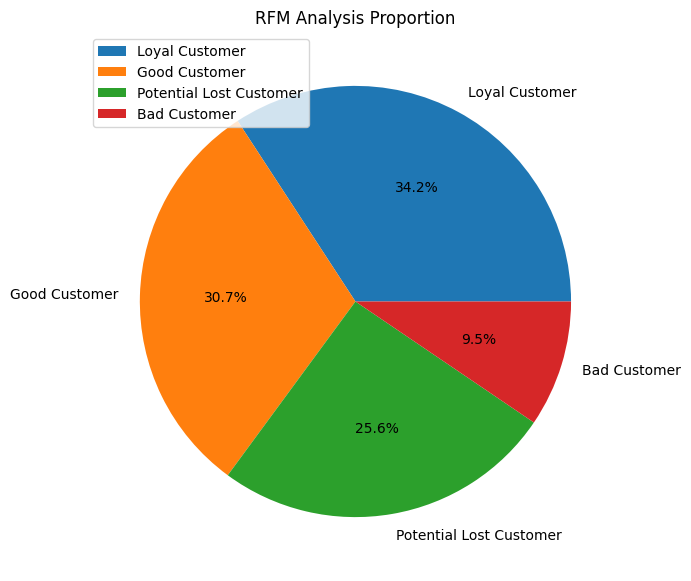

In [79]:
# Membuat Pie Chart
plt.figure(figsize=(7,7))
segment = dk['Segment'].value_counts()
plt.pie(segment,labels=segment.index,autopct='%1.1f%%')
plt.title('RFM Analysis Proportion')
plt.legend(loc='upper left')
plt.show()

**Kesimpulan Berdasarkan RFM Analysis**
1. Loyal Customer (34.2%): Segmen ini menunjukkan bahwa supermarket memiliki basis pelanggan yang setia. Ini adalah indikator yang baik dan menunjukkan bahwa strategi retensi pelanggan supermarket cukup efektif.

2. Good Customer (30.7%): Segmen ini juga cukup besar, menunjukkan bahwa supermarket memiliki banyak pelanggan yang membeli di Supermarkey dengan frekuensi dan jumlah yang cukup tinggi. Ini adalah pelanggan yang kemungkinan akan menjadi "Loyal Customer" jika dikelola dengan benar.

3. Potential Lost Customer (25.6%): Persentase ini cukup tinggi, menunjukkan bahwa ada risiko kehilangan sejumlah besar pelanggan jika tindakan tidak diambil untuk meningkatkan retensi.

4. Bad Customer (9.5%): Meskipun persentasenya lebih kecil dibandingkan dengan segmen lain, ini menunjukkan pelanggan yang mungkin tidak menemukan nilai yang ditawarkan oleh supermarket atau pelanggan yang baru saja mencoba layanan dan belum memutuskan untuk kembali.

**Rekomendasi Berdasarkan RFM Analysis:**
1. Untuk Loyal dan Good Customer: Pertahankan dan dorong mereka untuk berbelanja lebih banyak melalui program loyalitas atau penawaran khusus.

2. Untuk Potential Lost Customer: Cari tahu alasan mereka berpotensi meninggalkan supermarket dan buat strategi untuk menarik mereka kembali—mungkin melalui penawaran khusus, diskon, atau komunikasi yang lebih efektif.

3. Untuk Bad Customer: Evaluasi apakah memang layak untuk menghabiskan sumber daya untuk mengubah mereka menjadi pelanggan yang lebih baik, atau fokus pada segmen yang lebih menguntungkan.

4. Secara Umum: Tingkatkan pelayanan pelanggan dan kualitas produk untuk semua segmen untuk meningkatkan keseluruhan kepuasan pelanggan.

 

## **Kesimpulan**

1. **General**
- Pelanggan paling besar melakukan pengeluaran pada product Wine dan Meat.
- Sweet Product dan Fruit Product memiliki pengeluaran terendah oleh Pelanggan.
- Diskon tidak mempengaruhi frekuensi pembelian dan total pengeluaran pelanggan.
- Campaign 2 jarang diminati oleh pelanggan.

2. **Profil Pelanggan**:
- **RFM Analysis**: Mayoritas Customer Supermarket adalah "Good Customer" dan "Loyal Customer," menunjukkan bahwa Supermarket memiliki basis pelanggan yang kuat dan loyal.

3. **Demografi**: 
- Berdasarkan Tingkat pendidikan Graduation merupakan segmen terbesar pada Supermarket.
- Berdasarkan Marital Status Married merupakan segmen terbesar pada supermarket .
- Berdasarkan tahun kelahiran pelanggan Generasi X merupakan segmen terbesar pada supermarket.

4. **Berdasarkan Income Category**: 
- Pelanggan dengan pendapatan "Very High" dan "High" lebih banyak dan lebih responsif terhadap kampanye pemasaran.

5. **Enrollment Customer**: 
Ada variasi dalam waktu pendaftaran pelanggan, tetapi tidak ada pola khusus yang menonjol. Ini mungkin menunjukkan efektivitas pemasaran yang stabil sepanjang waktu.

6. **Pola Belanja**:
- Saluran Pembelanjaan: Mayoritas pelanggan lebih suka berbelanja di toko fisik dibandingkan online atau melalui katalog.
- Kategori Produk: Wine dan Meat adalah kategori yang paling populer, dengan total pengeluaran tertinggi, sedangkan Fruits dan Sweets memiliki total pengeluaran paling rendah.

7. **Berdasarkan Demografi**:

- Pelanggan yang memiliki status Divorced cenderung menghabiskan lebih banyak uang, terutama pada produk wine.
- Pelanggan dengan tingkat pendidikan "PhD" atau "Graduation" cenderung menghabiskan lebih banyak uang, terutama pada kategori wine dan daging.
- Pelanggan dari generasi Pre Boomer cenderung menghabiskan lebih banyak uang dibandingkan dengan Baby Boomer, Generasi X dan Millennials.
- Berdasarkan Pendapatan: Pelanggan dengan pendapatan "Very High" memiliki pengeluaran tertinggi di semua kategori produk.
- Distribusi Kategori Income sangat merata (seluruh tingkat kategori income memiliki distribusi yang sama) sehingga dapat disimpulkan bahwa seluruh kalangan dalam pendapatan berbelanja diSupermarket

8. **Respons terhadap Campaign**:
- Efektivitas Campaign: Pelanggan dengan pendapatan "Very High" dan "High" serta tingkat pendidikan "Graduation" cenderung lebih responsif dalam menerima Campaign

## **Rekomendasi**:

1. **Segmentasi Target**: 
- Fokuskan sumber daya pemasaran dan penjualan pada segmen pelanggan yang telah terbukti responsif terhadap kampanye dan memiliki tingkat pengeluaran yang tinggi.

2. **Strategi Channel dari Supermarket**:

- Tingkatkan pengalaman berbelanja di Store (toko fisik), karena ini adalah saluran paling populer.
- Investasikan dalam peningkatan situs Web untuk menarik lebih banyak pelanggan online.
- Pertimbangkan personalisasi katalog untuk pelanggan yang lebih suka berbelanja melalui saluran ini.

3. **Optimasi Produk dan Penawaran**:

- Pertimbangkan paket bundling untuk kategori produk yang sering dibeli bersama, seperti Wine dan Meat.
- Tawarkan promosi atau diskon pada kategori produk yang kurang populer seperti Sweet Producy dan Sweet Product untuk mendorong penjualan.
- Optimalkan Campaign: Evaluasi dan sesuaikan kampanye pemasaran yang kurang efektif, terutama untuk segmen demografis yang menunjukkan respons yang lebih rendah.
- Lakukan evaluasi terhadap Campaign 2 karena terbukti kurang efektif dan jarang diterima oleh pelanggan

4. **Strategi Produk**: 
- Sesuaikan penawaran produk berdasarkan pola belanja pelanggan untuk meningkatkan penjualan dan kepuasan pelanggan.

5. **Manajemen Persediaan**: 
- Optimalisasi persediaan berdasarkan kategori produk yang paling sering dibeli untuk memastikan ketersediaan.

6. **Analisis Enrollment**: 
- Pertimbangkan untuk melakukan analisis lebih lanjut pada data pendaftaran pelanggan untuk mengetahui apakah ada musim atau periode tertentu yang efektif untuk mendapatkan pelanggan baru.


Berikut Link Visualisasi pada Tableau : https://public.tableau.com/app/profile/rifqy.athala/viz/CapstoneProjectModule2_16953923822140/Story